In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

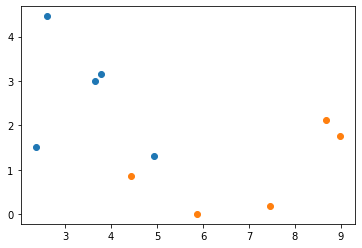

In [2]:
data = pd.read_excel("16-Adaboost.xlsx", usecols=[0, 1, 2], header=3)[:10].astype(np.float64)
plt.scatter(data.X1[:5], data.X2[:5])
plt.scatter(data.X1[5:], data.X2[5:])

## 重みを更新しながら各Modelで予測する

In [3]:
condition = pd.Series(dtype=np.float64)
condition['Model1'] = data['X1'] <= 4.932600453
condition['Model2'] = data['X2'] > 2.122873405
condition['Model3'] = data['X2'] > 0.862698005

In [4]:
predict = pd.DataFrame()
weight = np.array([1 / len(data)] * len(data))
for column, cond in condition.iteritems():
    output = np.where(cond, 0, 1)
    error = np.where(output == data['Y'], 0, 1)
    weighted_error = weight * error
    misrate = np.sum(weighted_error) / np.sum(weight)
    stage = np.log((1 - misrate) / misrate)
    predict[column] = stage * np.where(output == 0, -1, 1)
    weight *= np.exp(stage * weighted_error)

## 各Modelの予測結果から予測する

In [5]:
predict['final'] = np.where(predict.T.sum().T < 0, 0, 1)
predict

,Model1,Model2,Model3,final
0,-2.197225,-1.416548,-1.452794,0
1,-2.197225,-1.416548,-1.452794,0
2,-2.197225,1.416548,-1.452794,0
3,-2.197225,1.416548,-1.452794,0
4,-2.197225,-1.416548,-1.452794,0
5,2.197225,1.416548,-1.452794,1
6,2.197225,1.416548,1.452794,1
7,2.197225,1.416548,-1.452794,1
8,2.197225,1.416548,1.452794,1
9,-2.197225,1.416548,1.452794,1


## 精度を確かめる

In [6]:
accuracy = (predict['final'] == data['Y']).sum() / len(data)
print(str(accuracy * 100) +'%')

100.0%
